In [1]:
# Meng-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('used_car_data.csv')

### Eksplorasi awal

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
print(df.columns.values)

['Name' 'Location' 'Year' 'Kilometers_Driven' 'Fuel_Type' 'Transmission'
 'Owner_Type' 'Mileage' 'Engine' 'Power' 'Seats' 'Price']


In [6]:
df.shape

(6019, 12)

In [7]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [8]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### Jawaban soal

<b> 1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut? </b>

Kolom `Name` berisi informasi mengenai merek mobil pada kata pertama dan seri mobil pada kata berikutnya. Sehingga untuk mendapatkan informasi mengenai merek mobil yang tersedia, kata pertama pada kolom `Name` dipisahkan terlebih dahulu.

In [9]:
df['Merek'] = [word.split(' ')[0] for word in df['Name'].astype('str')]
df['Seri'] = [word.split(' ')[1:] for word in df['Name'].astype('str')]

In [10]:
df['Merek'] = df.Merek.str.capitalize()

In [11]:
df['Merek'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-benz     318
Volkswagen        315
Ford              300
Mahindra          272
Bmw               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Bentley             1
Smart               1
Ambassador          1
Name: Merek, dtype: int64

<b> 2. Kota apa yang memiliki mobil bekas paling banyak? </b>

Pada kolom `Location` tidak terdapat `null` dan sudah bertipe `object`. Sehingga untuk mendapatkan informasi mengenai kota dengan mobil bekas terbanyak, dapat dilakukan dengan menghitung nilai-nilai pada kolom `Location`.

In [12]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [13]:
df['Location'].value_counts().nlargest(1)

Mumbai    790
Name: Location, dtype: int64

<b> 3. Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut? </b>

Kolom `Year` merupakan data numerik dengan tipe data `int64`. Maka untuk mendapatkan distribusi tahun edisi mobil-mobil bekas tersebut, dapat dilakukan dengan melihat visualisasi histogram maupun ringkasan statistik kolom `Year`.

In [14]:
df['Year'].describe()

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

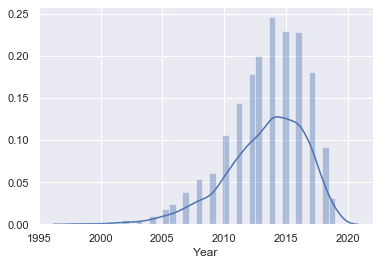

In [15]:
sns.distplot(df['Year'])

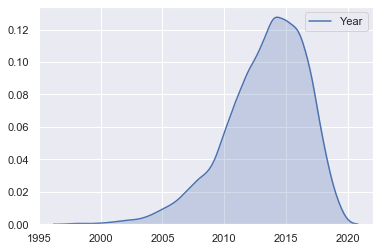

In [16]:
sns.kdeplot(data=df['Year'], shade=True)

In [17]:
df['Year'].skew()

-0.8458021355296015

Dari visualisasi dan ringkasan statistik kolom `Year`, dapat disimpulkan bahwa distribusi tahun mobil bekas pada dataset adalah *negative skew*/*left-skewed*.

<b> 4. Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer? </b>

In [18]:
df.Kilometers_Driven[df.Kilometers_Driven < 100000].count()

5470

<b> 5. Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban. </b>

Untuk menganalisis jarak pemakaian, dibuat `temp_df` terlebih dahulu untuk melakukan eksplorasi yang tidak mengganggu DataFrame sebenarnya. Sebenarnya dengan melihat dari ringkasan statistik kolom `Kilometers_Driven` dapat diperkirakan kategori rendah atau tinggi melalui mediannya. Namun kami mencoba membuat kolom baru yang memuat informasi usia mobil pada kolom `Old` dan kilometer per tahun pada kolom `Kilometers_per_Year`. Hal ini dilakukan untuk mendapatkan informasi mengenai kisaran kilometer per tahun pada dataset.

In [19]:
temp_df = df

In [20]:
temp_df['Kilometers_per_Year'] = temp_df['Kilometers_Driven'] / (2020 - temp_df['Year'])
temp_df['Old'] = 2020 - temp_df['Year']

In [21]:
temp_df[['Kilometers_per_Year', 'Old', 'Kilometers_Driven']].describe()

,Kilometers_per_Year,Old,Kilometers_Driven
count,6.019000e+03,6019.000000,6.019000e+03
mean,9.931727e+03,6.641801,5.873838e+04
std,2.851800e+04,3.269742,9.126884e+04
min,9.700000e+01,1.000000,1.710000e+02
25%,5.825667e+03,4.000000,3.400000e+04
50%,8.333333e+03,6.000000,5.300000e+04
75%,1.180000e+04,9.000000,7.300000e+04
max,2.166667e+06,22.000000,6.500000e+06


Berdasarkan informasi diatas, diperkirakan jika `Kilometers_per_Year` diatas 10 ribu km atau `Kilometers_Driven` diatas 60 ribu km sudah termasuk tinggi **pada dataset ini**. Berdasarkan sumber, rata-rata mobil menempuh 10 ribu - 20 ribu km per tahun. Artinya, dalam 5 tahun, mobil menempuh 50 ribu hingga 100 ribu km. Jika mobil sudah melebihi 400 ribu km, mobil tersebut sudah tidak layak digunakan [[1](https://id.priceprice.com/mobil/bekas/panduan-membeli-mobil-bekas/Mengapa-Total-Jarak-Tempuh-Penting-Saat-Mencari-Mobil-Bekas-9840/)], [[2](https://cintamobil.com/jual-beli/membeli-mobil-bekas-berdasarkan-odometer-aid351)], [[3](https://otospector.co.id/tips-mengetahui-keaslian-odometer-mobil)]. Adapun menurut sumber lain, rata-rata mobil menempuh 20 ribu - 30 ribu km per tahun dengan jarak tempuh total maksimum garansi 200 ribu km [[4](https://carfromjapan.com/article/industry-knowledge/how-many-km-are-cars-engineered-for/)]. 

<b> 6. Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban. </b>

Untuk melihat *outlier*, dapat menggunakan *boxplot*.

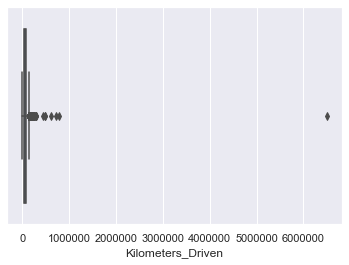

In [22]:
sns.boxplot(x=df['Kilometers_Driven'])

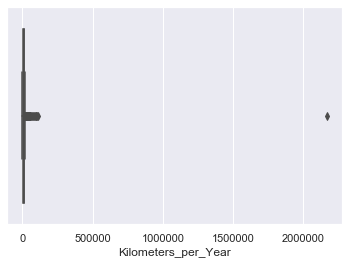

In [23]:
sns.boxplot(x=df['Kilometers_per_Year'])

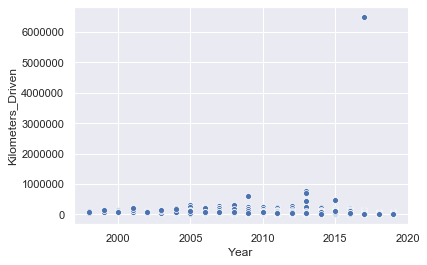

In [24]:
sns.scatterplot(x='Year', y='Kilometers_Driven', data=df)

Berdasarkan sumber diatas, sangat jelas bahwa mobil dengan `Kilometers_Driven` lebih dari 6 juta km adalah *outlier*.

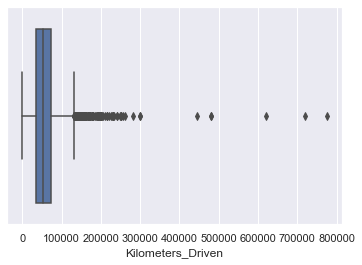

In [25]:
sns.boxplot(x=df.Kilometers_Driven[df.Kilometers_Driven < 1000000])

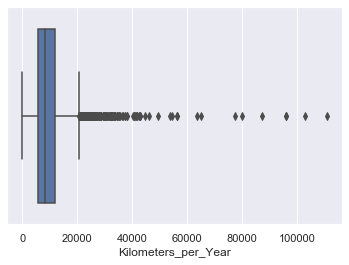

In [26]:
sns.boxplot(x=df.Kilometers_per_Year[df.Kilometers_per_Year < 2000000])

In [27]:
df[df.Kilometers_Driven > 300000].sort_values('Kilometers_per_Year', ascending=False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Merek,Seri,Kilometers_per_Year,Old
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.00,Bmw,"[X5, xDrive, 30d, M, Sport]",2.166667e+06,3
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.50,Skoda,"[Octavia, Ambition, Plus, 2.0, TDI, AT]",1.107143e+05,7
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.90,Volkswagen,"[Vento, Diesel, Highline]",1.028571e+05,7
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,13.00,Volkswagen,"[Jetta, 2013-2015, 2.0L, TDI, Highline, AT]",9.600000e+04,5
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,5.00,Honda,"[City, i, VTEC, SV]",9.600000e+04,5
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,4.45,Hyundai,"[i20, Magna, Optional, 1.2]",6.357143e+04,7
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.70,Hyundai,"[i10, Magna, 1.2]",5.636364e+04,11


Beberapa mobil diatas juga dapat diduga sebagai *outlier* karena memiliki jarak tempuh per tahun lebih dari 50 ribu km. Padahal berdasarkan sumber tadi, rata-rata mobil per tahun hanya 20 ribu - 30 ribu km per tahun. Sehingga untuk menjawab "Apakah ada *outlier* pada kolom `Kilometers_Driven`?", jawabannya "Ada". Untuk mobil dengan `Kilometers_Driven` diatas 6 juta, dapat **dipastikan** merupakan *outlier*, sedangkan mobil dengan `Kilometers_per_Year` diatas 50 ribu km/year juga **dicurigai** merupakan *outlier*.

<b> 7. Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban. </b>

In [28]:
df_year_km = df[['Year', 'Kilometers_Driven','Old', 'Kilometers_per_Year']]

In [29]:
corr_year_km = df_year_km.corr(method='pearson')
corr_year_km

,Year,Kilometers_Driven,Old,Kilometers_per_Year
Year,1.000000,-0.173048,-1.000000,0.077508
Kilometers_Driven,-0.173048,1.000000,0.173048,0.941555
Old,-1.000000,0.173048,1.000000,-0.077508
Kilometers_per_Year,0.077508,0.941555,-0.077508,1.000000


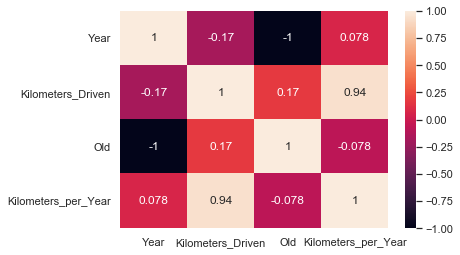

In [30]:
sns.heatmap(corr_year_km, 
            xticklabels=corr_year_km.columns,
            yticklabels=corr_year_km.columns,
            annot=True)

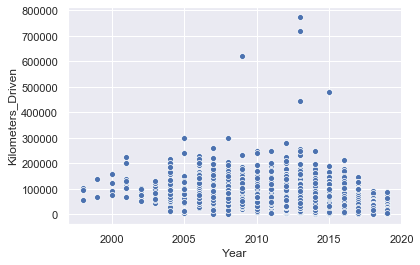

In [31]:
sns.scatterplot(x='Year', y=df.Kilometers_Driven[df.Kilometers_Driven < 6000000], data=df)

Berdasarkan korelasi dan heatmap diatas, ternyata usia kendaraan tidak mempengaruhi kilometer yang sudah ditempuh (tidak berkorelasi kuat). Karena penggunaan mobil setiap orang tentunya berbeda-beda. (**BUTUH SUMBER PENDUKUNG**)

<b> 8. Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih? </b>

In [32]:
df.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [33]:
len(df.Owner_Type[df.Owner_Type == 'Third']) + len(df.Owner_Type[df.Owner_Type == 'Fourth & Above'])

122

<b> 9. Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat? </b>

Kolom `Mileage` memiliki tipe data `object` karena mengandung satuan. Bahkan satuan yang dicantumkan berbeda-beda untuk `Fuel_Type` yang berbeda. Ada dua cara untuk melakukan analisis terhadap efisiensi paling hemat, yaitu:

1. Meng-konversi nilai pada kolom `Mileage` ke dalam satuan **efisiensi** yang sama.
2. Meng-konversi nilai pada kolom `Mileage` ke dalam satuan **mata uang** dengan mencari harga setiap jenis bahan bakarnya.

Kami menggunakan cara yang pertama karena informasi mengenai konversi satuan lebih mudah didapatkan dibanding informasi harga bahan bakar. Adapun sumber konversi antar satuannya berada pada tautan berikut:

1. Link
2. Link

In [34]:
df_hemat = df.filter(['Fuel_Type', 'Mileage'], axis=1)

In [35]:
df_hemat['Mileage'].isnull().sum()

2

In [36]:
df_hemat.sort_values('Mileage', ascending=False)

,Fuel_Type,Mileage
3580,Diesel,9.9 kmpl
1288,Petrol,9.9 kmpl
557,Petrol,9.9 kmpl
4001,Petrol,9.8 kmpl
4519,Petrol,9.8 kmpl
...,...,...
5943,Diesel,0.0 kmpl
707,Diesel,0.0 kmpl
5311,Diesel,0.0 kmpl
4446,Electric,NaN


Untuk mobil dengan `Fuel_Type == 'Electric'`, nilai `Mileage` menjadi `NaN` karena memang mobil listrik memiliki satuan efisiensi yang berbeda, yaitu kWh. Oleh karena itu wajar pada dataset ini nilai tersebut tidak ditemukan. Maka untuk selanjutnya, akan dianalisis bahan bakar paling efisien selain dari `Fuel_Type == 'Electric'` karena memang datanya tidak ada dan satuannya yang berbeda (kWh).

Selanjutnya dibuat fungsi untuk konversi dari satuan `km/kg` menjadi `kmpl` untuk `Fuel_Type == 'LPG'` dan `Fuel_Type == 'CNG'` berdasarkan sumber diatas.

In [37]:
def kg_to_liter(mileage, bahan):
    konsumsi = mileage.split(' ')
    if bahan == 'LPG' and konsumsi[1] == 'km/kg':
        return float(konsumsi[0]) / 1.96
    elif bahan == 'CNG' and konsumsi[1] == 'km/kg':
        return float(konsumsi[0]) / 1.39
    else:
        return float(konsumsi[0])

In [38]:
temp = []
for x in range(len(df_hemat)) :
    if df_hemat['Mileage'].isnull()[x]:
        temp.append(np.nan)
        continue
    qwe = kg_to_liter(df_hemat['Mileage'][x],df_hemat['Fuel_Type'][x])
    temp.append(qwe)

In [39]:
df_hemat['Mileage'] = temp

In [40]:
fuel = df_hemat['Fuel_Type'].unique()
mean = [df_hemat.Mileage[df_hemat['Fuel_Type'] == x].mean() for x in fuel]
med = [df_hemat.Mileage[df_hemat['Fuel_Type'] == x].median() for x in fuel]

In [41]:
df_hemat_new = pd.DataFrame(data={'Fuel_Type' : fuel,'Mean':mean,'Median':med})

In [42]:
df_hemat_new.sort_values('Mean')

,Fuel_Type,Mean,Median
3,LPG,9.890306,9.311224
2,Petrol,17.415204,17.800000
0,CNG,18.286357,19.136691
1,Diesel,18.620484,19.010000
4,Electric,NaN,NaN


Dengan demikian, dapat disimpulkan bahwa tipe bahan bakar paling hemat adalah `LPG` dengan rata-rata Mileage sebesar `9.890306 kmpl`, dengan catatan mobil listrik tidak diperhitungkan dan seperti yang dijelaskan sebelumnya, analisis dapat dilanjutkan dengan menggunakan informasi harga setiap bahan bakar.

<b> 10. Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban. </b>

In [43]:
df1 = pd.read_csv('used_car_data.csv')

In [44]:
df1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [46]:
df1.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Secara intuitif, `Name` seharusnya tidak berpengaruh terhadap harga. Sebenarnya `Merek` memiliki kemungkinan pengaruh terhadap harga, namun berdasarkan jawaban pada soal nomor 1 diatas, variasi `Merek` sangatlah banyak dan harganya pun beragam. Maka diputuskan kolom `Name` akan di-*drop* terlebih dahulu.

Selanjutnya, kami akan meninjau kolom `Location`.

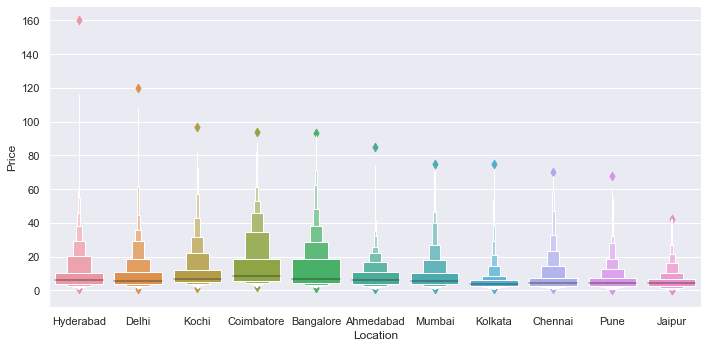

In [47]:
sns.catplot(y='Price', x='Location', data=df1.sort_values('Price', ascending=False), kind='boxen', aspect=2)

Selanjutnya akan dilakukan `One-Hot Encoding` pada kolom `Location`.

In [48]:
Location_OH = df1[['Location']]
Location_OH = pd.get_dummies(Location_OH, drop_first=True)

Pada kolom `Kilometers_Driven`, seperti yang dibahas pada soal nomor 6, terdapat *outlier*, yaitu pada `Kilometers_Driven` 6 juta km. Maka sebaiknya data ini di-*drop* saja.

In [49]:
df1 = df1[df1.Kilometers_Driven < 6000000]

Kemudian akan ditinjau kolom `Fuel_Type`.

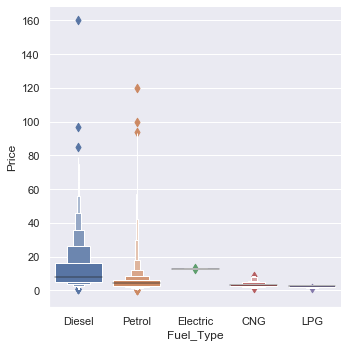

In [50]:
sns.catplot(y='Price', x='Fuel_Type', data=df1.sort_values('Price', ascending=False), kind='boxen')

Selanjutnya akan dilakukan `One-Hot Encoding` pada kolom `Fuel_Type`.

In [51]:
FuelType_OH = df1[['Fuel_Type']]
FuelType_OH = pd.get_dummies(FuelType_OH, drop_first=True)

Meninjau kolom `Transmission`.

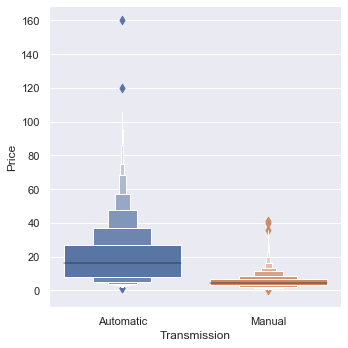

In [52]:
sns.catplot(y='Price', x='Transmission', data=df1.sort_values('Price', ascending=False), kind='boxen')

In [53]:
Transmission_OH = df1[['Transmission']]
Transmission_OH = pd.get_dummies(Transmission_OH, drop_first=True)

Kolom `Owner_Type` merupakan data kategorikal yang berurutan. Secara intuitif pun mobil "tangan kedua" tentu lebih tinggi harganya dibanding mobil "tangan ketiga". Maka tidak perlu melakukan One-Hot Encoding, cukup Label Encoding.

In [54]:
df1.replace({"First":1, "Second":2, "Third": 3, "Fourth & Above":4}, inplace=True)

Selanjutnya baris yang memiliki `null` pada kolom `Mileage`, `Engine`, `Power`, dan `Seats` akan di-*drop*.

In [55]:
df1 = df1[df1['Mileage'].notna()]
df1 = df1.drop(['Mileage', 'Fuel_Type'], axis=1)

In [56]:
df1 = pd.concat([df1, df_hemat['Mileage']], axis=1)

In [57]:
df1 = df1[df1['Engine'].notna()]
df1 = df1[df1['Power'].notna()]
df1 = df1[df1['Seats'].notna()]

In [58]:
df1 = pd.concat([df1, Location_OH, FuelType_OH, Transmission_OH], axis=1)

In [59]:
df1.drop(['Name', 'Location', 'Transmission'], axis=1, inplace=True)

In [60]:
df1['Engine'] = [word.split(' ')[0] for word in df1['Engine'].astype('str')]
df1['Power'] = [word.split(' ')[0] for word in df1['Power'].astype('str')]

In [61]:
df1['Engine'] = pd.to_numeric(df1['Engine'], errors='coerce')

In [62]:
df1['Power'] = pd.to_numeric(df1['Power'], errors='coerce')

In [63]:
df1.head()

,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,Mileage,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010.0,72000.0,1.0,998.0,58.16,5.0,1.75,19.136691,0,0,...,0,0,0,1,0,0.0,0.0,0.0,0.0,1.0
1,2015.0,41000.0,1.0,1582.0,126.20,5.0,12.50,19.670000,0,0,...,0,0,0,0,1,1.0,0.0,0.0,0.0,1.0
2,2011.0,46000.0,1.0,1199.0,88.70,5.0,4.50,18.200000,0,1,...,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0
3,2012.0,87000.0,1.0,1248.0,88.76,7.0,6.00,20.770000,0,1,...,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0
4,2013.0,40670.0,2.0,1968.0,140.80,5.0,17.74,15.200000,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0


In [64]:
df1 = df1[df1['Power'].notna()]

In [65]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5871 entries, 0 to 6018
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 5871 non-null   float64
 1   Kilometers_Driven    5871 non-null   float64
 2   Owner_Type           5871 non-null   float64
 3   Engine               5871 non-null   float64
 4   Power                5871 non-null   float64
 5   Seats                5871 non-null   float64
 6   Price                5871 non-null   float64
 7   Mileage              5871 non-null   float64
 8   Location_Bangalore   5871 non-null   uint8  
 9   Location_Chennai     5871 non-null   uint8  
 10  Location_Coimbatore  5871 non-null   uint8  
 11  Location_Delhi       5871 non-null   uint8  
 12  Location_Hyderabad   5871 non-null   uint8  
 13  Location_Jaipur      5871 non-null   uint8  
 14  Location_Kochi       5871 non-null   uint8  
 15  Location_Kolkata     5871 non-null   u

In [66]:
temp_Price = df1['Price']
df1.drop(['Price'], axis=1, inplace=True)
df1 = pd.concat([df1, temp_Price], axis=1)

<b> ========================================================================================= <b>

In [67]:
from sklearn.ensemble import ExtraTreesRegressor

In [68]:
X = df1.iloc[:,0:22]
y = df1.iloc[:,-1]

model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[1.48113587e-01 3.79977273e-02 5.22129914e-03 9.77866315e-02
 2.58099035e-01 3.26265503e-02 2.43229362e-02 5.02747040e-03
 2.16431863e-03 9.10659122e-03 3.95944670e-03 1.29919317e-02
 8.08207767e-04 4.96837743e-03 2.94207777e-03 3.61084526e-03
 1.37721993e-03 5.73627639e-02 0.00000000e+00 7.16913113e-07
 5.94613481e-03 2.85566130e-01]


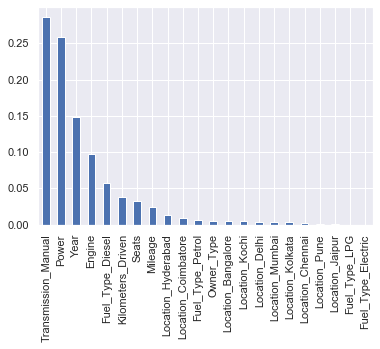

In [69]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='bar')
plt.show()

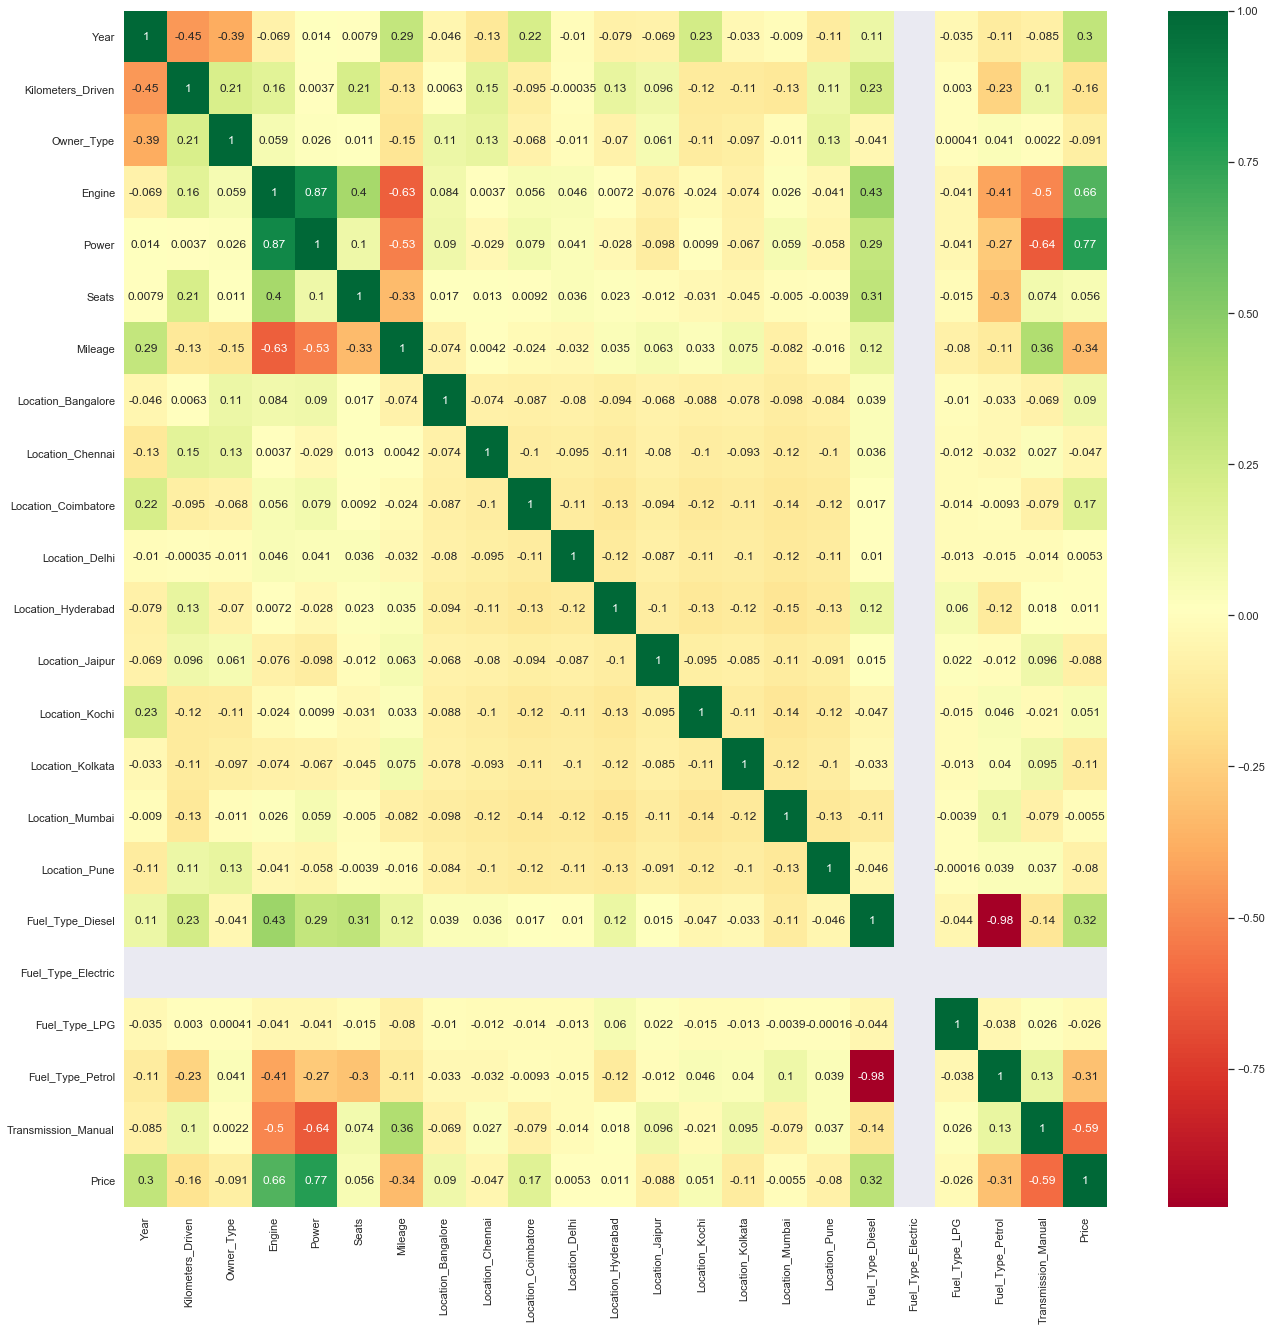

In [70]:
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22, 22))

g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Analisis tambahan

In [71]:
df0 = pd.read_csv('used_car_data.csv')

In [78]:
df0.info()
print('=' * 50)
df.info()
print('=' * 50)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  


<b> Jenis transmisi apa yang memiliki efisiensi lebih tinggi? </b>

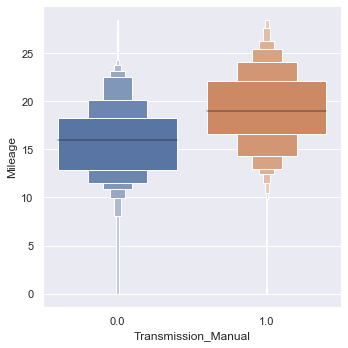

In [76]:
sns.catplot(y='Mileage', x='Transmission_Manual', data=df1.sort_values('Mileage', ascending=False), kind='boxen')

Ternyata mobil dengan Transmisi manual rata-rata lebih efisien dibanding transmisi Automatic.

<b> Jenis transmisi apa yang memiliki power lebih tinggi? </b>

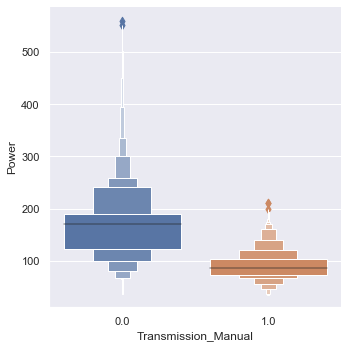

In [79]:
sns.catplot(y='Power', x='Transmission_Manual', data=df1.sort_values('Power', ascending=False), kind='boxen')

<b> Jenis transmisi apa yang memiliki engine lebih tinggi? </b>

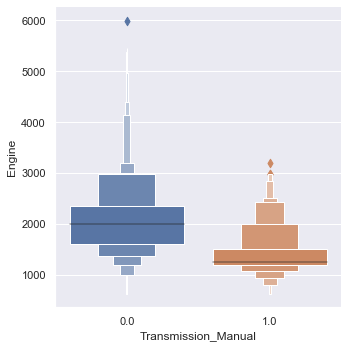

In [80]:
sns.catplot(y='Engine', x='Transmission_Manual', data=df1.sort_values('Engine', ascending=False), kind='boxen')

<b> Apakah semakin tua mobil maka efisiensi semakin rendah? </b>

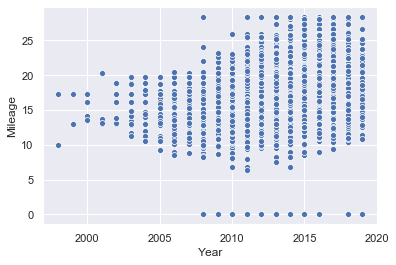

In [82]:
sns.scatterplot(x='Year', y='Mileage', data=df1)

<b> Bagaimana pengaruh jumlah tempat duduk terhadap efisiensi dan engine? </b>

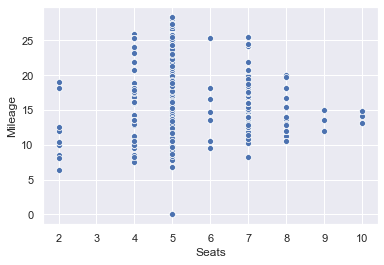

In [83]:
sns.scatterplot(x='Seats', y='Mileage', data=df1)

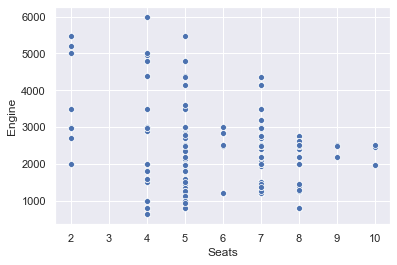

In [84]:
sns.scatterplot(x='Seats', y='Engine', data=df1)

<b> Bagaimana kisaran harga untuk masing-masing merek mobil? </b>

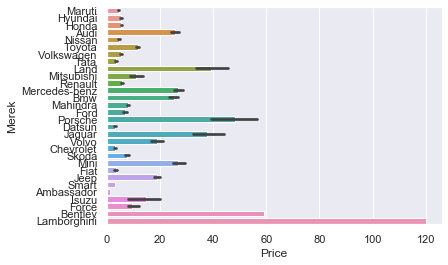

In [88]:
sns.barplot(y='Merek', x='Price', data=df)

<b> Merek mobil bekas apa yang banyak di India? </b>

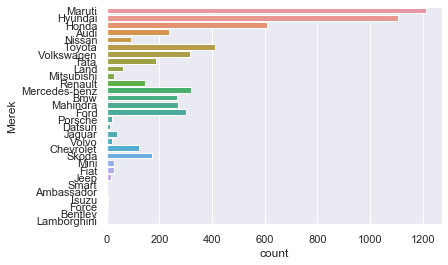

In [91]:
sns.countplot(y='Merek', data=df)

<b> Jenis bahan bakar apa yang banyak digunakan pada mobil bekas di India? </b>

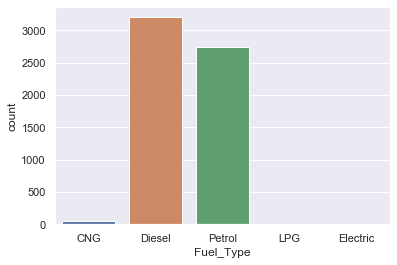

In [92]:
sns.countplot(x='Fuel_Type', data=df)

<b> Bagaimana perbandingan transmisi mobil bekas di India? </b>

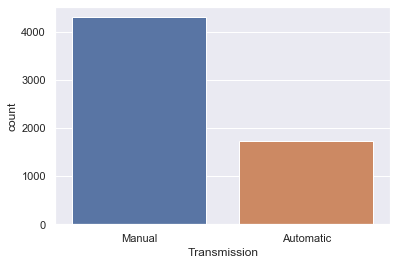

In [93]:
sns.countplot(x='Transmission', data=df)

<b> Mobil bekas yang ada di India biasanya tangan ke berapa? </b>

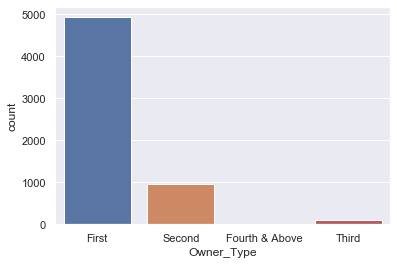

In [94]:
sns.countplot(x='Owner_Type', data=df)

<b> Apakah mobil keluaran baru lebih mahal dibanding mobil keluaran lama? </b>

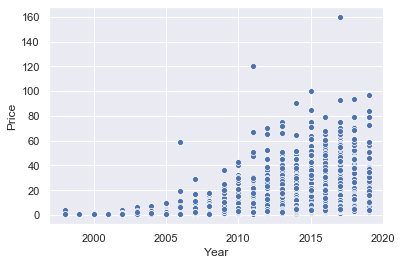

In [95]:
sns.scatterplot(x='Year', y='Price', data=df1)

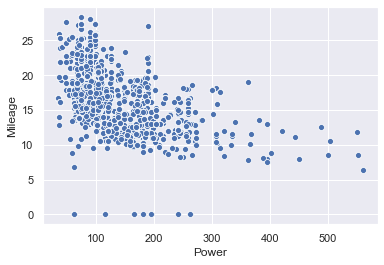

In [101]:
sns.scatterplot(x='Power', y='Mileage', data=df1)

In [114]:
df2 = pd.read_csv('used_car_data.csv')
df2['Merek'] = [word.split(' ')[0] for word in df2['Name'].astype('str')]
df2['Merek'] = df2.Merek.str.capitalize()
df2 = df2.drop(['Mileage'], axis=1)
df2 = pd.concat([df2, df_hemat['Mileage']], axis=1)

In [115]:
df2.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Merek,Mileage
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,Maruti,19.136691
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.670000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,Honda,18.200000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.770000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,Audi,15.200000


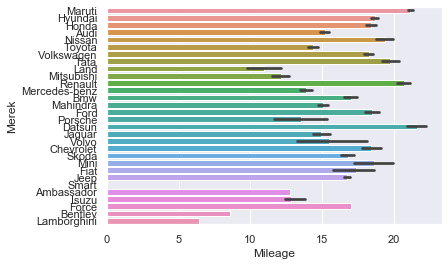

In [116]:
sns.barplot(y='Merek', x='Mileage', data=df2)